In [156]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import matplotlib.pyplot as pltt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn import tree

### Universal bank dataset


For this lab, we will use the Universal bank dataset. You will use different classification methods to predict whether a customer accepts their personal loan. There are a total of 5,000 customers in the data set and 14 variables. The variables are self-explanatory.

In [140]:
## Excerpt of the dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Data Preparation

In [157]:
#1. 1.Read dataframe. Do not include ID and Zip Code in the analysis. 
#DROP ID and ZipCode 
#df.drop(columns=['Column1', 'Column2'])
bank_df = pd.read_csv('/Users/sera/Downloads/dmba/UniversalBank.csv')
bank_df.drop(columns=['ID','ZIP Code'], inplace=True)

bank_df.head(2)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0


In [158]:
#2. 2.Convert categorical variables as dummies 
#[use the get_dummies() function from the pandas library]
bank_df['Education'] = bank_df['Education'].astype('category')
bank_df['Family'] = bank_df['Family'].astype('category')

new_categories = {1:'Undergrad',2:'Graduate',3:'Advanced/Professional'}
bank_df.Education.cat.rename_categories(new_categories, inplace=True)


bank_df = pd.get_dummies(bank_df, prefix_sep = '_', drop_first=True)
bank_df.columns

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family_2',
       'Family_3', 'Family_4', 'Education_Graduate',
       'Education_Advanced/Professional'],
      dtype='object')

In [159]:
#3. 3.Use a 70/30 split into train/valid. Create trainx, trainy, validx, validy
#trainx, validx, trainy, validy = train_test_split(x, y, test_size=0.3, random_state=1)

y = bank_df['Personal Loan']
X = bank_df.drop(columns=['Personal Loan'])

train_X, valid_X, train_y, valid_y = train_test_split(X,y,test_size = 0.3, random_state=1)

In [ ]:
###################################################################################
# 1. 1.	What is the target variable? How many instances are positive?             #
###################################################################################

The target variable is Personal Loan as we are trying to predict if a customer would be accepted for personal loan or not based on the different variables that we have in the dataset. 

There are 480 positive instances in the dataset when the target variable is Personal Loan

In [160]:
bank_df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [ ]:
###################################################################################
# 2. Build three classifiers: Decision Tree, Naïve Bayes, and Logistic Regression
# For each of the three classifiers:
# a. What are the 3 most important variables? 
# b. Calculate accuracy, precision, recall, and f-measure
###################################################################################

# Decision Trees

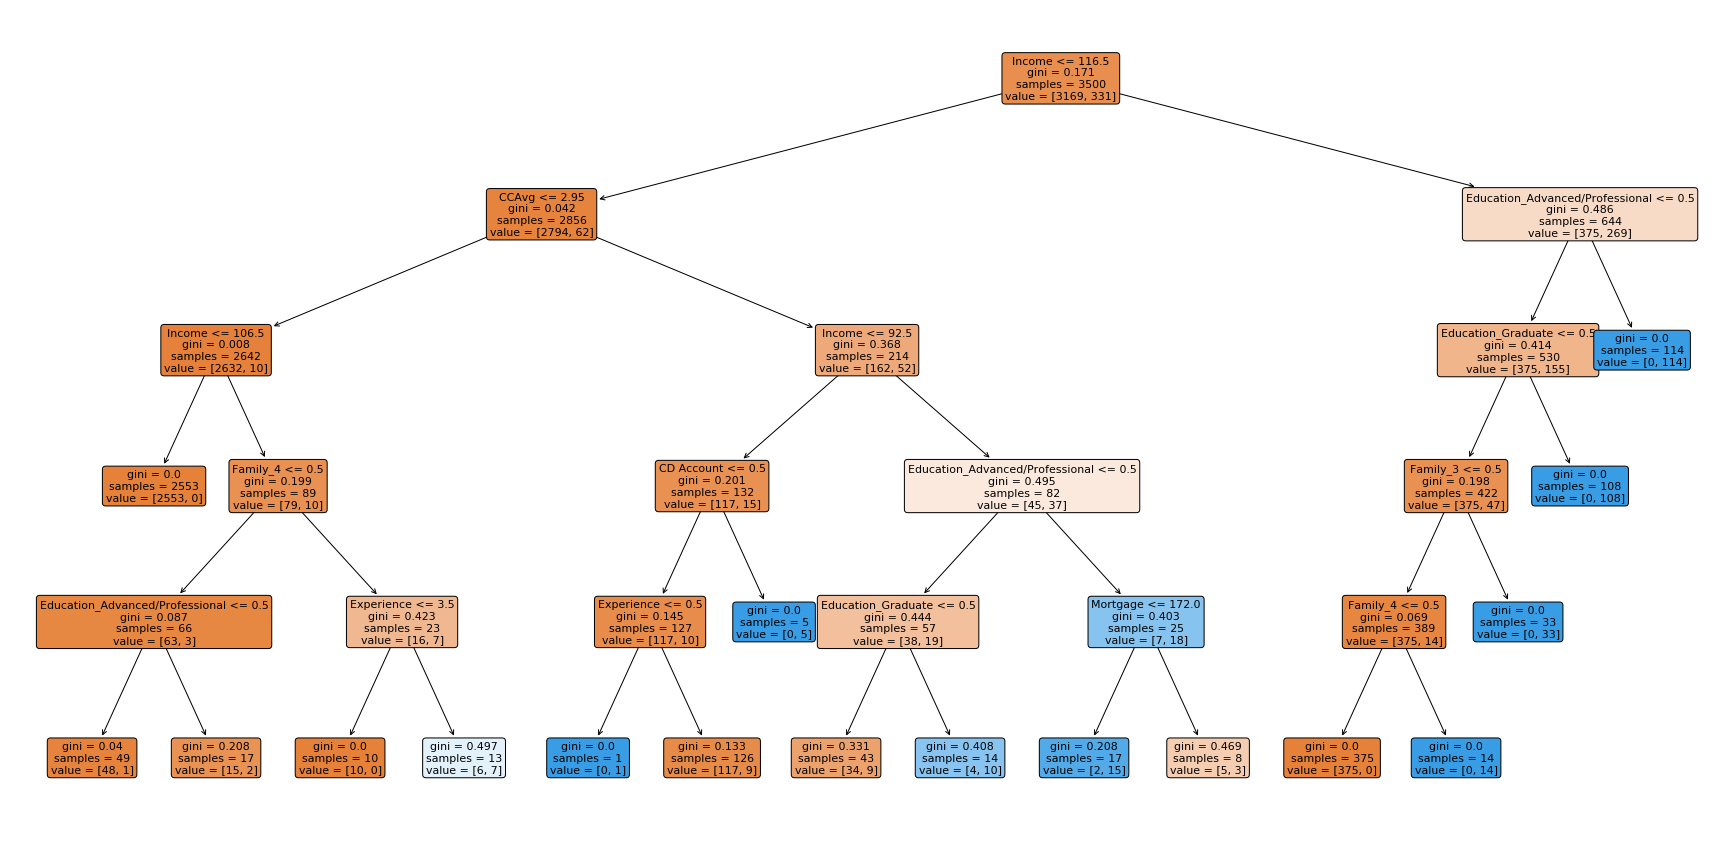

In [173]:
#Build decision tree

classTree = DecisionTreeClassifier(random_state=1, max_depth=5)
classTree.fit(train_X, train_y)


fig = plt.figure(figsize=(30,15))
_ = tree.plot_tree(classTree, feature_names=train_X.columns,  filled=True, fontsize=11,rounded=True)

In [162]:
#get the accuracy score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# Get the prediction for both train and test
prediction_train = classTree.predict(train_X)
prediction_valid = classTree.predict(valid_X)

# Measure the accuracy of the model for both train and test sets
print("Accuracy on train is:",accuracy_score(train_y,prediction_train))
print("Precision on train is:",precision_score(train_y,prediction_train))
print("Recall on train is:",recall_score(train_y,prediction_train))
print("F1 score on train is:",f1_score(train_y,prediction_train))
print(classificationSummary(train_y,prediction_train))
print()
print("Accuracy on test is:",accuracy_score(valid_y,prediction_valid))
print("Precision on test is:",precision_score(valid_y,prediction_valid))
print("Recall on test is:",recall_score(valid_y,prediction_valid))
print("F1 score on test is:",f1_score(valid_y,prediction_valid))
print(classificationSummary(valid_y,prediction_valid))

Accuracy on train is: 0.9897142857142858
Precision on train is: 0.9623824451410659
Recall on train is: 0.9274924471299094
F1 score on train is: 0.9446153846153847
Confusion Matrix (Accuracy 0.9897)

       Prediction
Actual    0    1
     0 3157   12
     1   24  307
None

Accuracy on test is: 0.98
Precision on test is: 0.9219858156028369
Recall on test is: 0.87248322147651
F1 score on test is: 0.896551724137931
Confusion Matrix (Accuracy 0.9800)

       Prediction
Actual    0    1
     0 1340   11
     1   19  130
None


In [163]:
importance_dt = pd.DataFrame({'features':train_X.columns, 'importance_level':classTree.feature_importances_})
importance_dt.sort_values('importance_level',ascending=False)

,features,importance_level
2,Income,0.328442
12,Education_Graduate,0.259788
13,Education_Advanced/Professional,0.182836
10,Family_3,0.104026
11,Family_4,0.053870
3,CCAvg,0.041683
6,CD Account,0.015024
1,Experience,0.009178
4,Mortgage,0.005153
0,Age,0.000000


The 3 most important variables in the Decision Tree classifier are Income, Education_Graduate, Education_Advanced/Professional

# Logistic Regression

In [164]:
#build the logistic regression model logit_reg
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

logit_reg = LogisticRegression(penalty='l2',C=1e42,solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()

intercept  -12.825618704766944
            Age  Experience    Income     CCAvg  Mortgage  Securities Account  \
coeff -0.022704    0.027929  0.062609  0.246589  0.000924           -1.078128   

       CD Account   Online  CreditCard  Family_2  Family_3  Family_4  \
coeff    3.692072 -0.57811   -0.996909  0.027304  2.481474  1.633904   

       Education_Graduate  Education_Advanced/Professional  
coeff            4.005842                         4.279289  



In [165]:
prediction_train = logit_reg.predict(train_X)
prediction_valid = logit_reg.predict(valid_X)
print("Accuracy on train is:",accuracy_score(train_y,prediction_train))
print("Precision on train is:",precision_score(train_y,prediction_train))
print("Recall on train is:",recall_score(train_y,prediction_train))
print("F1 score on train is:",f1_score(train_y,prediction_train))
print(classificationSummary(train_y,prediction_train))
print()
print("Accuracy on test is:",accuracy_score(valid_y,prediction_valid))
print("Precision on test is:",precision_score(valid_y,prediction_valid))
print("Recall on test is:",recall_score(valid_y,prediction_valid))
print("F1 score on test is:",f1_score(valid_y,prediction_valid))
print(classificationSummary(valid_y,prediction_valid))

Accuracy on train is: 0.9617142857142857
Precision on train is: 0.8745247148288974
Recall on train is: 0.6948640483383686
F1 score on train is: 0.7744107744107744
Confusion Matrix (Accuracy 0.9617)

       Prediction
Actual    0    1
     0 3136   33
     1  101  230
None

Accuracy on test is: 0.958
Precision on test is: 0.9134615384615384
Recall on test is: 0.6375838926174496
F1 score on test is: 0.7509881422924901
Confusion Matrix (Accuracy 0.9580)

       Prediction
Actual    0    1
     0 1342    9
     1   54   95
None


In [166]:
importance_lr = pd.DataFrame({'features':train_X.columns, 'importance_level':logit_reg.coef_[0]})
importance_lr.sort_values('importance_level',ascending=False)

,features,importance_level
13,Education_Advanced/Professional,4.279289
12,Education_Graduate,4.005842
6,CD Account,3.692072
10,Family_3,2.481474
11,Family_4,1.633904
3,CCAvg,0.246589
2,Income,0.062609
1,Experience,0.027929
9,Family_2,0.027304
4,Mortgage,0.000924


The 3 most important variables in Logistic Regression are Education_Advanced/Professional, Education_Graduate, CD Account

# Naive Bayes

In [167]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# run naive Bayes
nb = GaussianNB()
nb.fit(train_X, train_y)

# predict probabilities
prediction_train = nb.predict_proba(train_X)
prediction_valid = nb.predict_proba(valid_X)

In [168]:
prediction_train = nb.predict(train_X)
prediction_valid = nb.predict(valid_X)

print("Accuracy on train is:", accuracy_score(train_y,prediction_train))
print("Precision on train is:",precision_score(train_y,prediction_train))
print("Recall on train is:",recall_score(train_y,prediction_train))
print("F1 score on train is:",f1_score(train_y,prediction_train))
print(classificationSummary(train_y,prediction_train))
print()
print("Accuracy on test is:",accuracy_score(valid_y, prediction_valid))
print("Precision on test is:",precision_score(valid_y,prediction_valid))
print("Recall on test is:",recall_score(valid_y,prediction_valid))
print("F1 score on test is:",f1_score(valid_y,prediction_valid))
print(classificationSummary(valid_y,prediction_valid))

Accuracy on train is: 0.8911428571428571
Precision on train is: 0.44493392070484583
Recall on train is: 0.6102719033232629
F1 score on train is: 0.5146496815286624
Confusion Matrix (Accuracy 0.8911)

       Prediction
Actual    0    1
     0 2917  252
     1  129  202
None

Accuracy on test is: 0.876
Precision on test is: 0.4106280193236715
Recall on test is: 0.5704697986577181
F1 score on test is: 0.4775280898876404
Confusion Matrix (Accuracy 0.8760)

       Prediction
Actual    0    1
     0 1229  122
     1   64   85
None


In [169]:
importance_nb = pd.DataFrame({'features':train_X.columns, 'importance_level':nb.theta_[0]})
importance_nb.sort_values('importance_level',ascending=False)

,features,importance_level
2,Income,66.107289
4,Mortgage,51.449353
0,Age,45.523193
1,Experience,20.287157
3,CCAvg,1.715762
7,Online,0.588514
8,CreditCard,0.296308
13,Education_Advanced/Professional,0.289997
12,Education_Graduate,0.271379
9,Family_2,0.264437


The 3 most important variables in Naive Bayes are Income, Mortgage, Age

In [ ]:
###################################################################################
# 3. Which one is the best performing model/classifier? Why                       #
###################################################################################

The best model in this case is the Decision Tree with an accuracy of 0.99 on the train dataset and 0.98 on the test data. The precision, recall and f1 score is also the highest in the Decision Tree model hence it tells that the False Positives and False Negatives are the lowest and hence Decision Tree is the most accurate model in this case. 

In [ ]:
###################################################################################
# 4. Create a meaningful visualization between the variable and the target variable #
# of interest [for the top 2 most important variables from (3)]                     #
###################################################################################

In [170]:
importance_dt = pd.DataFrame({'feature':train_X.columns, 'importance_level':classTree.feature_importances_})
importance_dt.sort_values('importance_level',ascending=False)

,feature,importance_level
2,Income,0.328442
12,Education_Graduate,0.259788
13,Education_Advanced/Professional,0.182836
10,Family_3,0.104026
11,Family_4,0.053870
3,CCAvg,0.041683
6,CD Account,0.015024
1,Experience,0.009178
4,Mortgage,0.005153
0,Age,0.000000


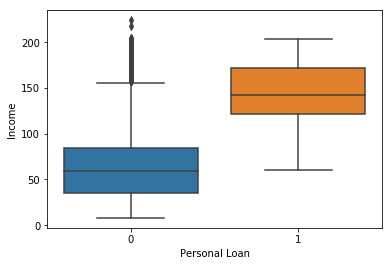

In [171]:
import seaborn as sns
tips = bank_df[['Income','Personal Loan']]
sns.boxplot(y='Income',x='Personal Loan',data=tips)

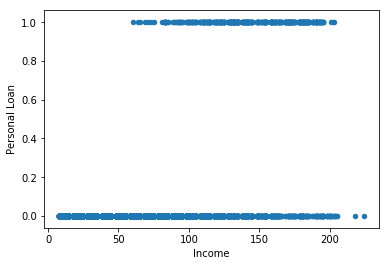

In [172]:
bank_df.plot.scatter(x='Income',y='Personal Loan')

In [ ]:
#############################################################################################
#5.Based on these outputs what are some key insights from the analysis? (2-3 bullet points)#
#############################################################################################

1. Income and Level of Education(Graduate) are the most important variables in predicting if you will be given a loan or not. 
2. In some instances a person may have very high income but may still not be given loan based on the other variables. 
3. The Decision Tree model will help predict which customer will accept the loan or not and this way we can avoid sending any marketing material to the people who we have predicted will not accept the loan and this way we can save marketing dollars.
4. Not all models have the same variables as the most important ones. 